Lambda School Data Science

*Unit 4, Sprint 2, Module 1*

---

# Architect (Prepare)
__*Neural Network Foundations*__

## Learning Objectives
* <a href="#p1">Part 1</a>: Student should be able to describe the foundational components of a neural network
* <a href="#p2">Part 2</a>: Student should be able to introduce the Keras Sequential Model API
* <a href="#p3">Part 3</a>: Student should be able to learn how to select a model architecture

Neural Networks are a whole new area of study and application that can be intimidating, but which represents some of the most powerful tools and techniques that we possess in machine learning today. In spite of the hype surrounding these topics I hope that you will come to see them as just another tool in your tool bag with their own strengths and weaknesses. They are useful, but they are not a silver bullet, and they are not always preferable to other -perhaps more simple- machine learning methods. 

The goal of this week is to familiarize you with the fundamental theory, terminology and libraries that will enable you to approach different neural network architectures. This week will not be a run-through of the history of Neural Networks and each of the individual advancements leading up to current technologies -we don't have time for that. We will spend some time on some older methods, but only to the degree that they will help introduce us to relevant terminology and understand more complex versions of these technologies.

# Foundational Neural Network Components (Learn)
<a id="p1"></a>

## Overview

### Major Components
- Weights & Bias
- Neurons
- Activation Functions
- Layers
- Loss Function

Let's zoom in on one of those components, arguably the most important component of all - the neuron.

----

### Dissecting the Artificial Neuron (a.k.a Perceptron)

Every branch of science has a fundamental unit, a baseline model of a physical system, that is used as the starting point (the first priciple) of that science. Every idea, experiment result, and hypothesis in a branch of science rest upon the building block of that science; unless you're doing purely theoretical work that is explicitly looking to introduce a new builing block, challenge the first priciples. So it's important that we understand the builidng block of any science that we wish to study. 

In **Physics**, the fundamental building block is the **particle**.

In **Chemistry**, the fundamental building block is the **chemical element**. 

In **Biology**, the fundamental building block is the **cell**.

In **Neuroscience**, the fundamental building block is the **Neuron**.

**You are about to learn computational Neuronscience!** 

This image has a side-by-side comparison of a biological model of a neuron and a computational model of a neuron.
![](https://miro.medium.com/max/610/1*SJPacPhP4KDEB1AdhOFy_Q.png)


Let's dive deeper into the computationl model of the neuron. 
![](https://images.squarespace-cdn.com/content/v1/59d9b2749f8dce3ebe4e676d/1547561883197-ZO8CJILFNGZMORIJZOJ1/ke17ZwdGBToddI8pDm48kAuxETKhxDsgKuKi-UGpnEIUqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8N_N4V1vUb5AoIIIbLZhVYxCRW4BPu10St3TBAUQYVKcofcaXKJYLRX9EzsQWIgTsTayKHY9LJ3-BRv5jWxoI5y-JkyZtODn1AMLPOg8sn20/Artificial-Neuron.png )

**Note:** The $\mathbf{T}$ superscript on the $\mathbf{w}$ weight vector stands for a vector/matrix transpose. Sometimes these are necessary in order to get the dimensions of a vector or matrix product to align so that a valid product can take place. 

**This is a Very Important Equation!**

This is the neuron in a single equation, all the relevant terms are preseant. This equation will continue to reappear as we continue our study of various neural network architectures, gradient descent, and back-propagation. 


$$\mathbf{y = f(w^T x + b )}$$

----
### Build a perceptron from scratch!

First let's define some terms!

Let $\mathbf {X}$ be defined as the set of all vectors in an $\mathbf{N}$-dimensional vector space denoted as $\mathbb{R}^{N}$ 

Let $\mathbf {x}$ be a vector from $\mathbf {X}$ such that $\mathbf {x} \in \mathbf {X}$

Let $\mathbf {W}$ be defined as the set of all weight vectors in $\mathbb{R}^{N}$  

Let $\mathbf {w}$ be a vector from $\mathbf {W}$ such that $\mathbf {w} \in \mathbf {W}$

Let $\mathbf {b}$ be a scaler from $\mathbb{R}$ 

In [ ]:
!pip install glances

     |████████████████████████████████| 1.5MB 32.5MB/s 


In [ ]:
!glances

)07=92672d862d43 (Ubuntu 18.04 64bit / Linux 5.4.109+)Uptime: 0:05:20CPU  [ 55.6%]   CPU      55.6%  idle:     2.0% MEM      6.5% SWAP      0.0%
MEM  [  6.5%]   user:     1.0%total:  12.7G total:       0
SWAP [  0.0%]   system:   0.0%used:    848M used:        0iowait:   1.0%free:   11.9G free:        0

NETWORK       Rx/s   Tx/s   TASKS   7 (43 thr), 1 run, 6 slp, 0 oth 
eth0            0b     0b
lo              0b     0b   CPU%   MEM%      PID USER       THR  NI S >0.0   0.9        58 root       13    0 S python3 -mTCP CONNECTIONS 0.0   0.5        46 root       3     0 S python2 /uListen                 12    0.0   0.4         1 root       11    0 S node /dataInitiated               1    0.0   0.2       127 root       2     0 R python3 /uEstablished            19    0.0   0.1        78 root       8     0 S python3 /uTerminated              1    0.0   0.1        47 root       5     0 S dap_multipTracked         38/262144    0.0   0.0        14 root       1     0 S tail -n +0FILE SY

In [ ]:
import numpy as np

# Although the math holds for any N-dim vector, let's keep things simple

# define our 2-dim input vectors and input matrix 
x1 = np.array([10, 20])
x2 = np.array([-10, -20])
x3 = np.array([100, 111])

X = np.array([x1, 
              x2, 
              x3])

# define our 2-dim weight vector
w = np.array([.2, .4]) 

# define out bias term 
b = 1

In [ ]:
X, w

(array([[ 10,  20],
        [-10, -20],
        [100, 111]]), array([0.2, 0.4]))

In order to calculate a **weighted sum**, we can calculate a dot product between each pair of input and weight vectors 

$${\displaystyle \mathbf {w} \cdot \mathbf {x} }~~=~~{\displaystyle \sum _{i=1}^{m}w_{i}x_{i}}$$

In [ ]:
def calc_weighted_sum(x, w):
    """Calculates a matrix and vector product"""
    # YOUR CODE HERE
    return x.dot(w).sum()

In [ ]:
calc_weighted_sum(X, w)

64.4

Next, we declare that there exist a function such that its output ranges from [0, 1] and that 

$${\displaystyle f(\mathbf {x} )={\begin{cases}1&{\text{if }}\ \mathbf {w} \cdot \mathbf {x} +b>0,\\0&{\text{otherwise}}\end{cases}}}$$



Fortunately, there is a function that we can use for this and it's called the [**Sigmoid**](https://en.wikipedia.org/wiki/Sigmoid_function)

In [ ]:
def sigmoid(w_sum, b):
    """Calclate the output of a sigmoid """
    sig_input = w_sum + b
    return 1/(1+np.exp(-sig_input))

In [ ]:
sigmoid(64.4, 1)

1.0

In [ ]:
sigmoid(64.4, -64.4)

0.5

In [ ]:
sigmoid(64.4, -68)

0.026596993576866002

$$\textbf{Sigmoid in its algebraic expression}$$
$${\displaystyle S(x)={\frac {1}{1+e^{-x}}}}$$


$$\textbf{Sigmoid in its geometric expression}$$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1200px-Logistic-curve.svg.png)

By setting a threshold value of 0.5, we can ensure that our function returns a 1 for positive input values and a 0 for negative input values. 

In [ ]:
# calculate weighted sum value

In [ ]:
# calculate output of activation function

In [ ]:
# put it all together 
def perceptron(w, X, b):
    """
    Calculates the sigmoid of a weighted sum plus a bias term f( w * x + b)
    and returns a classification for the input data (i.e. a prediction)
    
    Returns a 1 if sigmoid output is greated than the threshold
    Returns a 0 if sigmoid output is less than the threshold
    
    Parameters
    ----------
    w: numpy array 
        weight vector
        
    X: numpy 2D array
        Input data 
        
    b: scalar (i.e. constant)
        Bias term 
        
    Returns 
    -------
    boolean vlaue 
    """
    threshold = 0.5
    w_sum = calc_weighted_sum(X, w)
    
    output = sigmoid(w_sum, b)

    if output > threshold:
      return 1
    else:
      return 0

In [ ]:
b = 1 # this is the original value of our bias 
perceptron(w, X, b)

1

In [ ]:
b = -70 # what happens when we change the bias to a large negative number ?
perceptron(w, X, b)

0

-----

### Question: What kind of predictive model is the perceptron?

The perceptron is a **linear binary classifier** - just like Logistic Regression 

**Linear** in the sense that it can only create linear decison bounaries between data points. 

**Binary** in the sense that it can only distinguish between two classes in a classification task. 

By combinding multiple neurons into a neural network we can overcome both of these limitations. More on this in a bit. For now, let's zoom back out and look at the big picture again. 

-----

## Back to the big picture


### Layers
A single *dense* layer is a collection of neurons. There are three common types of layers:
- Input
- Hidden
- Output

### Weights
Considered a parameter within our neural network. In the diagram above, you can consider a weight an arrow. During the training process, the weights are adjusted to minimize loss.

### Bias
Considered a parameter within our neural network. The bias term is a constant allowing greater flexibility in the output of a neuron.

### Neurons
Often called a "unit" which is shorthand for "activation unit". Neurons caculate the weighted sum of the inputs plus the bias term and pass the values thru an activation function. 

### Loss Functions
The function that informs the updating of weights via gradient descent. You want to minimize this function during training.  

### Activation Functions
Controls the output of any given neuron. Activation functions most important feature is its derivative or slope. The derivative is the portion that affects updating the weights during model training, **i.e. Gradient Descent**




**Sigmoid Curve and its Derivative**

![](https://i.stack.imgur.com/inMoa.png)

# Keras Sequential API (Learn)

## Overview

> "Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research. Use Keras if you need a deep learning library that:

> Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
Supports both convolutional networks and recurrent networks, as well as combinations of the two.
Runs seamlessly on CPU and GPU." 

### Keras Perceptron Sample

In [ ]:
import pandas as pd

data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [0,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')
X = df[['x1', 'x2']].values
y = df['y'].values

In [ ]:
df.head()

,x1,x2,y
0,0,0,0
1,1,0,1
2,0,1,1
3,1,1,0


In [ ]:
# import tensorflow as tf
# tf.random.set_seed(11)

In [ ]:
from tensorflow.keras.models import Sequential # lets you add things sequentially, similar API to 
from tensorflow.keras.layers import Dense

In [ ]:
## This is our perceptron 

# Step 1: Define the model arch
# instantiate a sequential model
model = Sequential()

# add a dense layer 
model.add(Dense(1, # use 1 neuron for our output layer
                input_dim=2, # we have 2 inputs (X1, X2)
                activation='sigmoid'
                ))
'''
This is equivalent to 
model = Sequential([
  Dense(1, # use 1 neuron for our output layer
                input_dim=2, # we have 2 inputs (X1, X2)
                activation='sigmoid'
                )
])
'''
# Step 2: Compile the model with correct Loss Function and desired optimizer. 
# Tensor flow will check this is a binary or not. If using wrong loss function Tf will give error
# compile the model 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Step 3: Fit the model and watch it train 
# fit the model 
model.fit(X, y, epochs=5)



Epoch 1/5
1/1 [==============================] - 0s 313ms/step - loss: 0.7672 - accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 0.7670 - accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 0.7668 - accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 0.7667 - accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 0.7665 - accuracy: 0.5000


In [ ]:
# evaluate the model
scores = model.evaluate(X, y)
print(f"{model.metrics_names[1]}: {scores[1]*100}")

1/1 [==============================] - 0s 104ms/step - loss: 0.7663 - accuracy: 0.5000
accuracy: 50.0


In [ ]:
X

array([[0, 0],
       [1, 0],
       [0, 1],
       [1, 1]])

In [ ]:
model.predict(X)

array([[0.49875036],
       [0.33860087],
       [0.7819773 ],
       [0.64855415]], dtype=float32)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


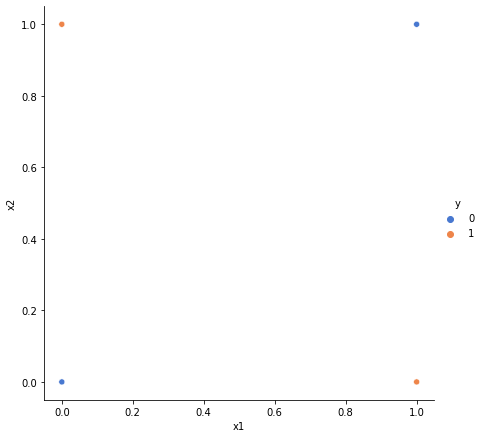

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# notice that we can't just draw a line to seperate the two classes
# that's because perceptrons are essentially logistic regression when we choose the sigmoid as our activation function
# logisitic regression are linear functions that assume that data is linearly distributed 
# our data is not linearly distributed 
sns.relplot(x="x1", y="x2", hue="y",
            sizes=(40, 400), alpha=1, palette="muted",
            height=6, data=df);


The perceptron is limited to linearly separable data sets. But if we combined them in a multi-perception model (i.e. a neural network) then they can handle non-linear data!

![](https://www.edureka.co/blog/wp-content/uploads/2017/07/Linear-528x264.jpg)

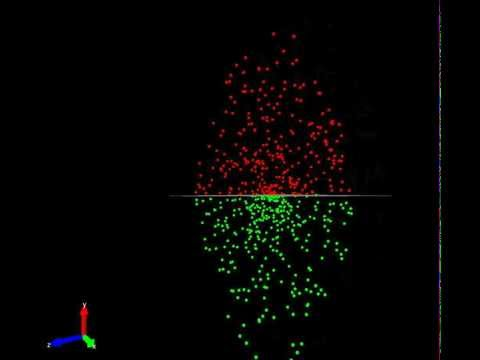

In [ ]:
# this video shows the Kernal Trick for SVM
# but neural networks (i.e. multi-perceptrons) apply the exact same concept 
from IPython.display import YouTubeVideo
YouTubeVideo('ndNE8he7Nnk')

**Through the mathematics of Linear Algebra, we can understand what is happending.**

We have a vector from a lower dimensional space that is operated on by a function that transforms it into a vector in a higher dimensional space. The geometry of those data points changes and when the right transformation is applyed, the data becomes seperable by a linear boundery. 

In neural netowrks, when data gets pass from one layer of neurons to another layer of neurons, the exact same type of transformation is happening - data is getted tossed around between vector spaces of various dimensions. 

Each hidden layer in the NN represents a vector space of some dimensionality. 

[**Check out this interactive tool to make this idea a bit more concrete**](http://alexlenail.me/NN-SVG/index.html)

## Follow Along

In the `Sequential` api model, you specify a model architecture by 'sequentially specifying layers. This type of specification works well for feed forward neural networks in which the data flows in one direction (forward propagation) and the error flows in the opposite direction (backwards propagation). The Keras `Sequential` API follows a standardarized worklow to estimate a 'net: 

1. Load Data
2. Define Model
3. Compile Model
4. Fit Model
5. Evaluate Model

You saw these steps in our Keras Perceptron Sample, but let's walk thru each step in detail.

### Load Data

In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np

In [ ]:
# Load the Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


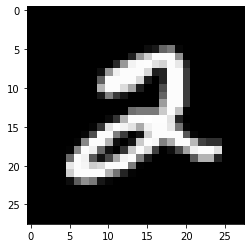

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[5]);
plt.imshow(X_train[5], cmap='gray');

In [ ]:
X_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
# normalize the pixel values 

# min max scaling
# Feature scaling
max_value = 255
X_train = X_train.astype('float32') / max_value
X_test = X_test.astype('float32') / max_value

In [ ]:
# flatten image 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [ ]:
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [ ]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
# method 2 is use flatten layer in Tensor Flow included in it 

### Define Model

In [ ]:
from tensorflow.keras import Sequential
# another is Functional API. Sequential needs each layer on top of another layer. And we create connected networks. Sequential dont work on MC, HN, BM model and for such one's Function API comes to rescue.
# if you want to use tables as inputs as your predictions then Functional API will be benefial. i.e. you can make it work however you want it to be be interconnected. 
# link - https://towardsdatascience.com/the-mostly-complete-chart-of-neural-networks-explained-3fb6f2367464

I'll instantiate my model as a "sequential" model. This just means that I'm going to tell Keras what my model's architecture should be one layer at a time.

In [ ]:
# https://keras.io/getting-started/sequential-model-guide/
model = Sequential()

Adding a "Dense" layer to our model is how we add "vanilla" perceptron-based layers to our neural network. These are also called "fully-connected" or "densely-connected" layers. They're used as a layer type in lots of other Neural Net Architectures but they're not referred to as perceptrons or multi-layer perceptrons very often in those situations even though that's what they are.

 > ["Just your regular densely-connected NN layer."](https://keras.io/layers/core/)
 
 The first argument is how many neurons we want to have in that layer. To create a perceptron-esque model we will just set it to 10. Our architecture is just an input and output layer. We will tell it that there will be 784 inputs coming into this layer from our dataset and set it to use the sigmoid activation function.

In [ ]:
# add a hidden layer 

model.add(Dense(128, input_dim=784, activation='relu'))
model.add(Dense(128, activation='relu'))

In [ ]:
len(np.unique(y_train))

10

In [ ]:
# add an output layer with softmax
model.add(Dense(10, activation='softmax'))

In [ ]:
# machine learning flashcards ChrisAlbon

In [ ]:
model.summary()
# 118,282 weights

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(784+1) * 128

100480

In [ ]:
(128+1)* 128

16512

In [ ]:
(128+1)*10

1290

### Compile Model
Using binary_crossentropy as the loss function here is just telling keras that I'm doing binary classification so that it can use the appropriate loss function accordingly. If we were predicting non-binary categories we might assign something like `categorical_crossentropy`. We're also telling keras that we want it to report model accuracy as our main error metric for each epoch. We will also be able to see the overall accuracy once the model has finished training.

#### Adam Optimizer
Check out this links for more background on the Adam optimizer and Stohastic Gradient Descent
* [Adam Optimization Algorithm](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)
* [Adam Optimizer - original paper](https://arxiv.org/abs/1412.6980)

In [ ]:
y_train[0:10]
# 10 output neuron

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
# sparse_categorical_crossentropy
# 5 -> [ 0 0 0 0 1 0 0 0 0]

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', # one hot encode the information above, instead of a 5
              metrics=['accuracy'])

### Fit Model

Lets train it up! `model.fit()` has a `batch_size` parameter that we can use if we want to do mini-batch epochs, but since this tabular dataset is pretty small we're just going to delete that parameter. Keras' default `batch_size` is `None` so omiting it will tell Keras to do batch epochs.

In [ ]:
results = model.fit(X_train, 
                    y_train, 
                    epochs=5, 
                    validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4108 - accuracy: 0.8780 - val_loss: 0.1151 - val_accuracy: 0.9653
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0986 - accuracy: 0.9689 - val_loss: 0.0881 - val_accuracy: 0.9741
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0675 - accuracy: 0.9780 - val_loss: 0.0904 - val_accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0499 - accuracy: 0.9839 - val_loss: 0.0910 - val_accuracy: 0.9747
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0390 - accuracy: 0.9871 - val_loss: 0.0801 - val_accuracy: 0.9774


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


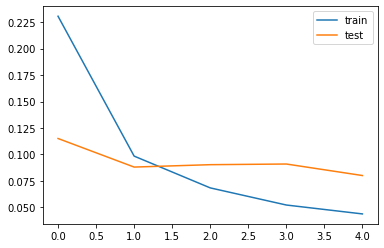

In [ ]:
import seaborn as sns

epochs = [i for i in range(len(results.history['loss']))]
sns.lineplot(epochs, results.history['loss'], label="train")
sns.lineplot(epochs, results.history['val_loss'], label="test");

### Evaluate Model

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0801 - accuracy: 0.9774


[0.08013258874416351, 0.977400004863739]

### Unstable Results

You'll notice that if we rerun the results might differ from the origin run. This can be explain by a bunch of factors. Check out some of them in this article: 

<https://machinelearningmastery.com/randomness-in-machine-learning/>

## Challenge

You will be expected to leverage the Keras `Sequential` api to estimate a feed forward neural networks on a dataset.

---

# Choosing Architecture (Learn)

## Overview

Choosing an architecture for a neural network is almost more an art than a science. The best way to choose an architecture is through research and experimentation. 

Let's do a few experiments, and track our results using a tool called TensorBoard which is a way to interactively visualize the results of our various experiences. Here is our previous model with TensorBoard incorporated: 

In [ ]:
%load_ext tensorboard

import os
import datetime
import tensorflow as tf

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [ ]:
## build a 1 layer neural network 

# instantiate a sequential model

# add a dense layer

# add an output layer

# complie the model 

# fit the model 



# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
%tensorboard --logdir logs

## Follow Along

Let's run a couple of experiments in groups based on your birthday: 
1. Jan - March:  Try adding an additional layer to the model
2. April - June: Add 2 hidden layers with identical number of neurons
3. July - Sept: Change the activation functions in the hidden layers (used as many layers as you want)
4. Oct - December: Try changing the optimization function and use any architecture that you want. 

### Additional Hidden Layer

In [ ]:
## build a single hidden layer neural network 

# instantiate a sequential model

# add 1st dense layer

# add 2nd dense layer

# add an output layer

# complie the model 

# fit the model 


# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
%tensorboard --logdir logs

### 2 Additional Hidden Layers

In [ ]:
## build a 3 hidden layer neural network 

# instantiate a sequential model

# add 1st dense layer

# add 2nd dense layer

# add 3rd dense layer

# add an output layer

# complie the model 

# fit the model 



# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
%tensorboard --logdir logs

### Different Activation Functions

In [ ]:
## build a 3 hidden layer neural network with different activation functions

# instantiate a sequential model

# add 1st dense layer

# add 2nd dense layer

# add 3rd dense layer

# add an output layer

# complie the model 

# fit the model 


# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
%tensorboard --logdir logs

### Different Optimization Functions

In [ ]:
## build a 3 hidden layer neural network with a different optimizer

# instantiate a sequential model

# add 1st dense layer

# add 2nd dense layer

# add 3rd dense layer

# add an output layer

# complie the model 

# fit the model 


# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
%tensorboard --logdir logs

## Challenge

You will have to choose your own architectures in today's module project. In the next module, we will discuss hyperparameter optimization which can help you handle these numerous choices. 

---

# Sources
Knowledge doesn't come out of a vacuum. Neither does our code. We build off the work of other incredibly intelligent and harding work people. The academic and impementation sections are our way of saying **Thank You** to them. The external review material is stuff we've watched or read in the past we think could also help you. 

## Academic References
(i.e. Theory and research we referenced in preparing this content)
- McCulloch, W.S. & Pitts, W. Bulletin of Mathematical Biophysics (1943) 5: 115. https://doi.org/10.1007/BF02478259
- Rosenblatt, F. (1958). The perceptron: A probabilistic model for information storage and organization in the brain. Psychological Review, 65(6), 386–408. https://doi.org/10.1037/h0042519
- Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning.

## Implementation References
(i.e. Stuff we used / referenced to make the code in this notebook)
- [NN-SVG](http://alexlenail.me/NN-SVG/index.html) by Alex Lenail. Used to generate diagrams for this notebook. 
- Alammar, Jay (2016). The Illustrated Transformer [A Visual and Interactive Guide to the Basics of Neural Networks](https://jalammar.github.io/visual-interactive-guide-basics-neural-networks/).
- [SINGLE LAYER NEURAL NETWORK - PERCEPTRON MODEL ON THE IRIS DATASET USING HEAVISIDE STEP ACTIVATION FUNCTION](https://www.bogotobogo.com/python/scikit-learn/Perceptron_Model_with_Iris_DataSet.php) by K Hong. For Perceptron Demo.

## External Review Material
(i.e. Stuff we recommend watching to go to the next level of understanding)

- [3 Blue 1 Brown Neural Network Videos](https://youtu.be/aircAruvnKk)
- [Andrew Ng Neural Network Introduction Videos](https://www.youtube.com/watch?v=1ZhtwInuOD0&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=43)